# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

### Домашнее задание №2. Визуализации

Задание выполнил(а):

    Климов Дмитрий

### Общая информация

__Дата выдачи:__ 02.02.2025

__Дедлайн:__ 04:00 09.02.2025

### Оценивание и штрафы

Каждая задача данного домашнего задания оценивается в 2 балла или 4 балла, в зависимости от сложности (балл указан в скобках рядом с номером задачи).

Оценка за домашнее задание вычисляется по следующей формуле:

$$
s_{\text{vis}} \times 1/4 ,
$$

где $s_{\text{vis}}$  — количество баллов, которое вы набрали в сумме по всем задачам.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе — указан для каждой группы в нашем телеграмм-канале.

## Раздел 1. Визуализации в датасете кредитного скоринга (14 баллов)

### О задании

В данном разделе вы попрактикуетесь в простейших визуализациях, а также в работе с библиотекой Matplotlib и Seaborn!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Обратите внимание, что во многих задачах раздела вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, существенная часть баллов будет выставляться именно за выводы, так как в анализе данных они имеют большое значение. Таким образом, на любое задание, сформулированное в виде вопроса, отвечайте текстом, подкрепляя ваши слова написанным и выполненным кодом. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*.

При решении задач, когда вам необходимо сделать какой-то фильтр, срез, выборку, или иное действие с данными, запрещается использовать циклы (`for`, `while`) и оператор `if`.

Кроме того, практически во всех заданиях от вас будет требоваться построить какие-то визуализации и графики. Каждый построенный вами график необходимо красиво оформить — для этого следует как минимум указать его название, а также отметить, что изображено по каждой из осей. Пожалуйста, не пренебрегайте оформлением и стилем ваших визуализаций, поскольку в этом ДЗ эти факторы тоже оцениваются.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()` и другие*

### 1.1. (2 балла)

Начнём с немного тренировочного и разгоночного задания без привязки к реальным данным, а лишь с использованием библиотек Numpy и Matplotlib.

Постройте график функций $sin(x)$ и $cos(x)$ на отрезке от $-\pi$ до $\pi$, используя ровно 100 точек для каждого, а также c легендой и сеткой. Линии графиков покрасьте в разные цвета на ваш выбор; одна из линий должна быть пунктирной.

Результат в данном и последующих заданиях раздела должен получиться примерно как на картинке внизу задания. Содержание подписей не требуется обязательно повторять в точности, как в примере, — однако графики в любом случае должны быть красиво и корректно оформлены.

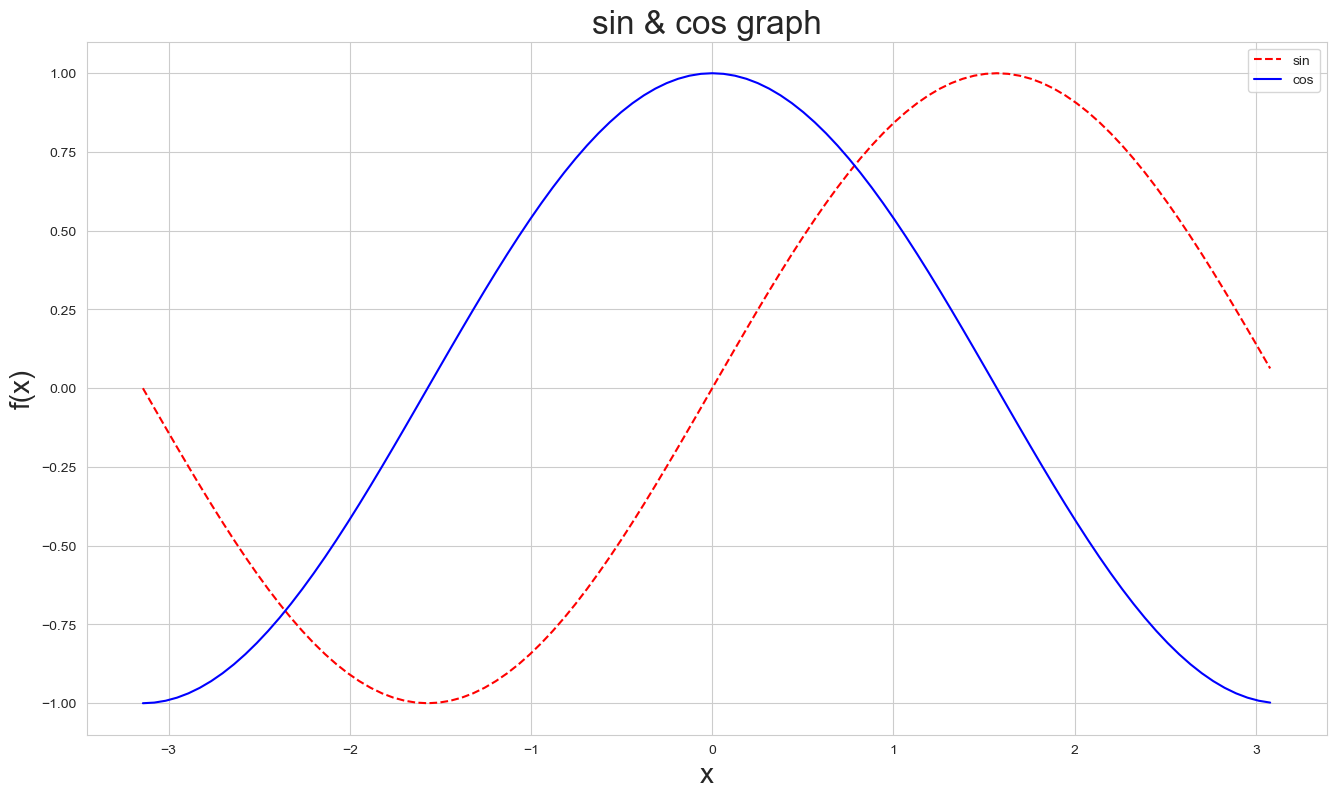

In [3]:
points = np.arange(-np.pi, np.pi, 2*np.pi/100)

sin = np.sin(points)
cos = np.cos(points)

plt.figure(figsize=(16,9))
plt.plot(points, sin, linestyle='--', color='red')
plt.plot(points, cos, color='blue')

plt.title('sin & cos graph', size=24)
plt.xlabel('x', size=20)
plt.ylabel('f(x)', size=20)

plt.legend(['sin', 'cos'])
plt.show()

### 1.2. (2 балла)

Начиная с текущего задания и далее, вы будете работать с задачей кредитного скоринга — оценкой надёжности клиента в банке.

В качестве датасета по этой задаче, вам предоставляются данные о тысяче клиентов, для каждого из которых нам известны около 20 характерестик-признаков, а также целевая переменная в виде положительной или отрицательной оценки в качестве кредитуемого. Именно эти данные вам предстоит исследовать в рамках задач визуализации в данном разделе.

*Описание данных*:

https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit


Считайте и сохраните в программе имеющийся у вас файл с данными кредитного скоринга `german_credit.csv` посредством функций из библиотеки Pandas.

Осуществите сравнение количества положительных и отрицательных исходов в наших данных в зависимости от размера текущего счёта клиента. Для этих целей постройте зеркальные горизонтальные гистограммы.

In [8]:
gc = pd.read_csv('german_credit.csv')
gc.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


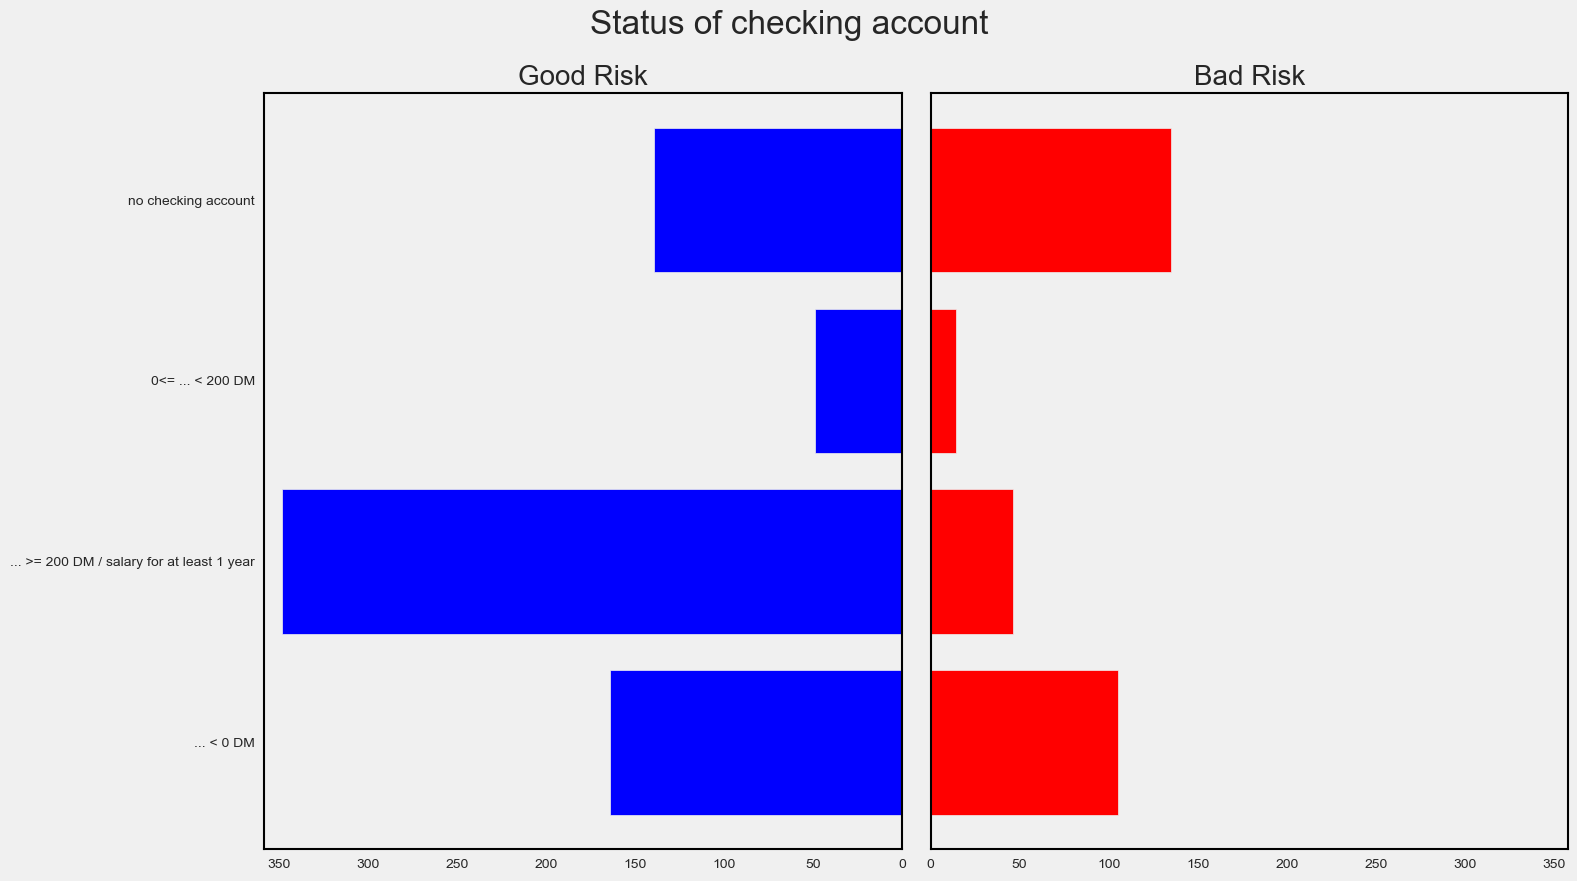

In [36]:
good_cnt = gc[gc["credit_risk"] == "good"]["status"].value_counts().sort_index()
bad_cnt = gc[gc["credit_risk"] == "bad"]["status"].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(16,9))
m = max(good_cnt.max(), bad_cnt.max()) + 10

ax1.barh(good_cnt.index, good_cnt.values, color="blue")
ax1.set_xlim([m, 0])
ax1.set_title("Good Risk", size=20)
ax1.grid(False)

ax2.barh(bad_cnt.index, bad_cnt.values, color="red")
ax2.set_xlim([0, m])
ax2.set_title("Bad Risk", size=20)
ax2.grid(False)

for ax in (ax1, ax2):
    for s in ax.spines.values():
        s.set_edgecolor("black")
        s.set_linewidth(1.5)

plt.suptitle("Status of checking account", size=24)
plt.tight_layout()
plt.show()

### 1.3. (2 балла)

Теперь постройте гистограмму для сравнения количества положительных и отрицательных исходов в зависимости от размера сберегательного счёта с помощью библиотеки Seaborn.

Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата? Проинтерпретируйте результаты обоих графиков: из текущего и предыдущего задания. Какие выводы можно сделать со стороны бизнеса?

In [62]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8 ,5

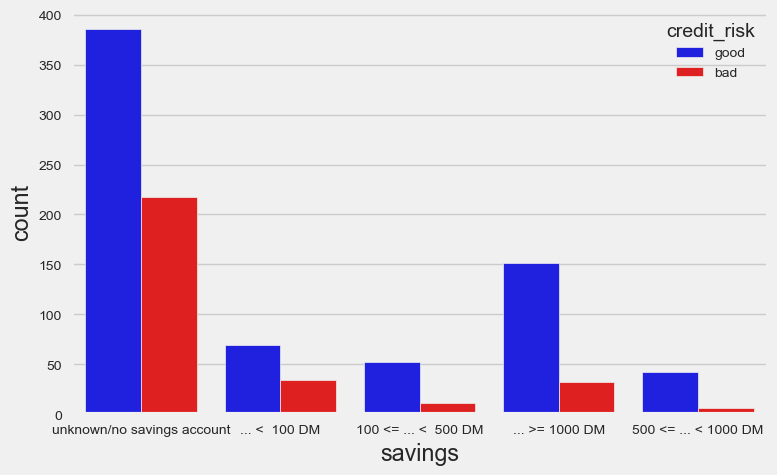

In [63]:
sns.countplot(data=gc, x="savings", hue="credit_risk", palette=["blue","red"])
plt.show()

### 1.4.  (2 балла)

Библиотека Seaborn может легко позволить визуализировать ещё больше информации на одном графике.

Давайте для каждого размера сберегательного счёта оценим не только количество положительных и отрицательных исходов, но и, например, распределение соответствующих клиентов по возрасту.

Постройте подходящую визуализацию — не обязательно ту, что представлена на картинке, — и сделайте выводы с точки зрения бизнеса.

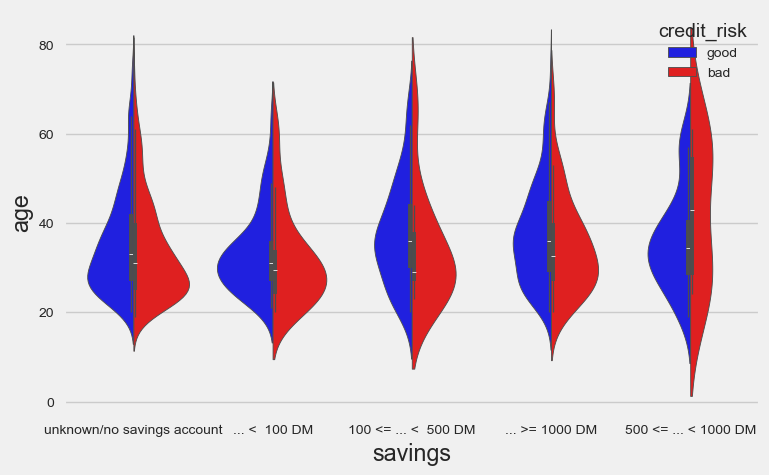

In [64]:
sns.violinplot(data=gc, x="savings", y="age", hue="credit_risk", split=True, palette=["blue","red"])
plt.show()

### 1.5. (2 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных исходов по возрастам, разместив их друг над другом. Добавим также распределение по всем клиентам третьим графиком. Не забудем сделать выводы и проинтерпретировать полученные результаты!

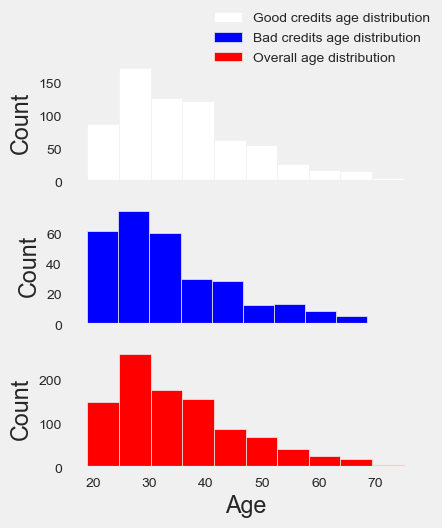

In [67]:
good = gc[gc["credit_risk"]=="good"]
bad = gc[gc["credit_risk"]=="bad"]

fig, axes = plt.subplots(nrows=3, figsize=(4,5), sharex=True)
axes[0].hist(good["age"], color="white")
axes[0].set_ylabel("Count")

axes[1].hist(bad["age"], color="blue")
axes[1].set_ylabel("Count")

axes[2].hist(gc["age"], color="red")
axes[2].set_ylabel("Count")
axes[2].set_xlabel("Age")

for ax in axes:
    ax.grid(False)


fig.legend(["Good credits age distribution", "Bad credits age distribution", "Overall age distribution"])
plt.show()

![шаманчик](https://avatars.dzeninfra.ru/get-zen_doc/9686475/pub_64a14e4a9b15861c243f91a5_64a14ea06a9fab54e4171c85/orig)

### 1.6. (2 балла)

Не менее полезной визуализацией порой может являться диаграмма рассеяния.

Постройте такую диаграмму, взяв продолжительность и размер кредита в качестве осей. Обозначьте положительные и отрицательные исходы разными цветами. Сделайте выводы.

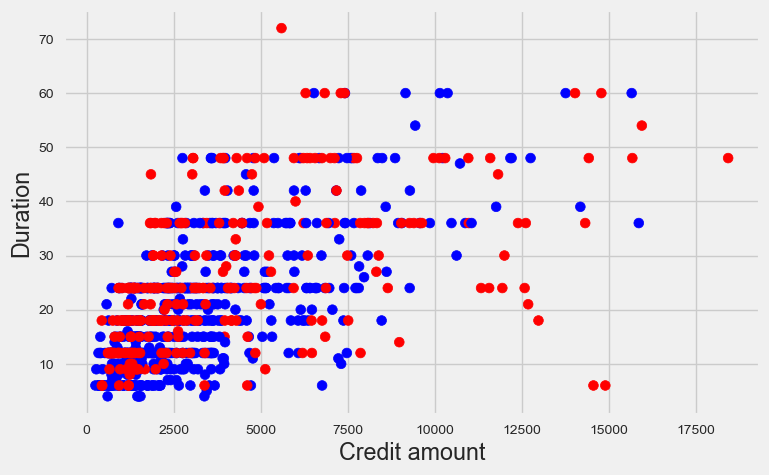

In [70]:
clrs = {"good":"blue", "bad":"red"}
plt.scatter(gc["amount"], gc["duration"], c=gc["credit_risk"].map(clrs))
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.show()

### 1.7. (2 балла)

Продвинемся немного глубже. Постройте 3D-версию диаграммы рассеяния, добавив ось с возрастом.

Что вы можете сказать о сравнении 3D- и 2D-визуализаций? Какие вы видите в них преимущества и недостатки?

Какие выводы с точки зрения бизнеса можно сделать из полученного графика?

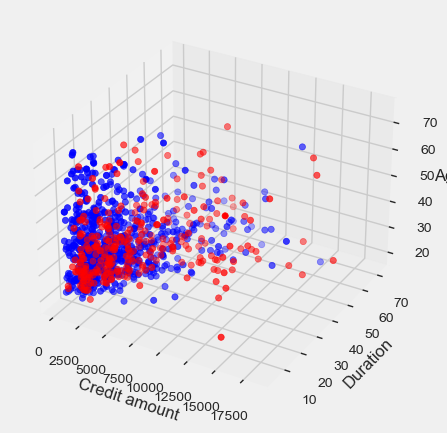

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for risk in ["good","bad"]:
    subset = gc[gc["credit_risk"] == risk]
    ax.scatter(subset["amount"], subset["duration"], subset["age"], c=clrs[risk])
ax.set_xlabel("Credit amount", size=12)
ax.set_ylabel("Duration", size=12)
ax.set_zlabel("Age", size=12)
plt.show()

## Раздел 2. Визуализации в датасете Netflix (26 баллов)


### О задании

В данном разделе вы продолжите практиковаться в визуализациях и поработаете с более сложными графиками и инструментами.

Все технические рекомендации остаются неизменными с прошлого раздела.

### 2.1.  (2 балла)

В этом разделе мы анализируем с вами датасет по Netflix — да-да, знакомая нам компания, но датасет другой.




Считайте и сохраните в программе имеющийся у вас файл с данными Netflix — `netflix_titles.csv`.

Определите количество пропусков (NaN) в колонке `director` и постройте столбчатую диаграмму, которая показывает 5 стран, содержащих наибольшее количество фильмов с пропусками в столбце `director`.

*Дополнительные требования к визуализации:*

- Заголовок — жирным шрифтом

In [ ]:
# your code here

### 2.2. (2 балла)

Постройте круговую диаграмму (pie chart), показывающую 5 стран, в которых произвели наибольшее количество фильмов.

*Дополнительные требования к визуализации:*

+ Заголовок — шрифтом `'monospace'`; жирный
+ Названия стран — шрифтом `'monospace'`
+ Подписи значений (%) — шрифтом `'monospace'`
+ Стиль диаграммы — `pastel` c помощью библиотеки Seaborn

```colors = sns.color_palette('pastel')[0:5]```

In [ ]:
# your code here

### 2.3. (4 балла)

Постройте subplots, где на первых осях (на первом графике) будет изображена круговая диаграмма, показывающая долю фильмов каждого рейтинга *(rating)*; а на вторых осях — столбчатая диаграмма, визуализирующая 3 страны с наибольшим количеством фильмов с рейтингом TV-MA. При этом, если в каких-то рейтингах фильмов присутствует меньше 50, то такие рейтинги исключаются из рассмотрения в рамках графика.

*Дополнительные требования к визуализации:*

+ Заголовки к диаграммам — жирным шрифтом
+ На круговой диаграмме — подписи значений абсолютные
+ На столбчатой диаграмме — ось Y справа
+ У столбчатой диаграммы — подпись «Количество фильмов» к оси Y и убрана подпись к оси X
+ У столбчатой диаграммы оставить видимыми только правую и нижнюю границы
+ Всю визуализацию (всю конструкцию) реализовать двумя способами: через функциональный и через объектный подход

In [ ]:
# your code here

### 2.4. (4 балла)

Преобразуйте колонку `date_added` к типу `datetime`  с помощью средств библиотеки Pandas. Создайте новые признаки: `month` и `year` — из преобразованного столбца. Затем, используя первый полученный признак, постройте линейный график — сколько в среднем фильмов было снято в каждый из месяцев.

*Дополнительные требования к визуализации:*

+ Заголовок — жирным шрифтом
+ Добавлены маркеры на точках перегиба
+ Настроена ось X: ось начинается с 1; заканчивается на 12; шаг 1

Сделайте выводы с точки зрения бизнеса.

In [ ]:
# your code here

### 2.5. (2 балла)

Используя второй созданный признак из предыдущего задания, постройте линейный график — динамика количества снятых фильмов по годам.

*Дополнительные требования к визуализации:*

+ Заголовок — жирным шрифтом
+ График — изменен цвет; линия графика представлена пунктиром
+ Добавлена решётка на фон

Сделайте выводы с точки зрения бизнеса.

In [ ]:
# your code here

### 2.6. (4 балла)

В этом и последующих заданиях будем работать со столбцом `duration`. Одни данные в столбце даны в минутах (для фильмов (`Movie`)); другие — в сезонах (для сериалов (`TV shows`)). В связи с этим создайте два новых столбца: `minutes` — для тех, у кого продолжительность в минутах, — и `season` — для тех, у кого продолжительность в сезонах. Заполните эти столбцы на основе исходного признака `duration`.

Постройте subplots, где на первых осях (на первом графике) будет изображена гистограмма распределения продолжительности фильмов; а на вторых осях — гистограмма распределения продолжительности сериалов.

*Дополнительные требования к визуализации:*

+ Заголовки к гистограммам — жирным шрифтом
+ Всю визуализацию (всю конструкцию) реализовать двумя способами: через функциональный и через объектный подход

Сделайте выводы с точки зрения бизнеса.

In [2]:
# your code here

### 2.7. (2 балла)

Постройте ящик с усами (box plot) по продолжительности фильмов. Проинтерпретируйте его.

In [ ]:
# your code here

## Задание повышенной сложности по библиотеке Plotly (6 баллов)

После тренировки с базовыми библиотеками, попробуем построить визуализацию с помощью Plotly.

In [3]:
import plotly

### 2.8. (6 баллов)

Постройте при помощи библиотеки Plotly интерактивную столбчатую диаграмму, которая сравнивает среднюю продолжительность фильмов и сериалов за каждый год, начиная с 2000.

In [ ]:
# your code here